<img src="img/img_covid.jpg">

# COVID-19 no Brasil

O Coronavírus (COVID-19) é uma doença infecciosa causada por um vírus. Ele causa problemas respiratórios semelhantes à gripe e sintomas como tosse, febre e, em casos mais graves, dificuldade para respirar.

O Brasil teve seu primeiro caso de Coronavírus confirmado no dia 26/02/2020 em São Paulo. 14 dias após a descoberta do primeiro caso o país já começou a passar por algumas mudanças em sua rotina, como por exemplo, suspensão de aulas e eventos com número elevado de pessoas, fechamento de lojas, bares, restaurantes e shoppings, além de recomendações constantes sobre a importância do isolamento social no combate à doença. Um mês depois do primeiro caso diversas cidades estavam com as ruas vazias por conta das medidas de isolamento e o número de pessoas contaminadas já havia chegado a 1000, hoje - 27/04/2020 - esse número já passa de 60000 casos confirmados e 4000 mortes.

<hr style="height:1px;border-width:0;color:gray;background-color:#C0C0C0">

Nesse projeto farei uma análise mostrando a evolução da doença no país e nos estados com o maior número de casos, utilizando a base de dados do Painel Coronavírus (https://covid.saude.gov.br/)



In [1]:
#Importando as bibliotecas que utilizarei nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando o dataset
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

### Analise inicial e tratamento dos dados

In [3]:
#lendo os 5 primeiros itens do dataset
cv.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
#Verificando as colunas, tipo de dados e se há dados faltando
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 7 columns):
regiao              2403 non-null object
estado              2403 non-null object
data                2403 non-null object
casosNovos          2403 non-null int64
casosAcumulados     2403 non-null int64
obitosNovos         2403 non-null int64
obitosAcumulados    2403 non-null int64
dtypes: int64(4), object(3)
memory usage: 131.5+ KB


In [5]:
#Gerando algumas estatisticas dos dados
cv.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2403.000000,2403.000000,2403.000000,2403.000000
mean,27.674157,349.405743,1.890553,21.057428
std,107.849044,1439.696757,9.435972,109.548213
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,12.000000,123.500000,0.000000,3.000000
max,2178.000000,21696.000000,211.000000,1825.000000


In [6]:
#criando um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())

#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

df_por_data.head()

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos
0,2020-01-30,0,0,0,0
1,2020-01-31,0,0,0,0
2,2020-02-01,0,0,0,0
3,2020-02-02,0,0,0,0
4,2020-02-03,0,0,0,0


# Dados da doença no Brasil

### Casos e Letalidade

In [68]:
print('Atualmente no Brasil temos um total de',df_por_data['casosNovos'].sum(),'Casos de COVID-19 e',df_por_data['obitosNovos'].sum(),'obitos.',
     'A letalidade dessa doença é de {x}%'.format(x=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,2)))

Atualmente no Brasil temos um total de 66501 Casos de COVID-19 e 4543 obitos. A letalidade dessa doença é de 6.83%


### Estados com mais casos 

In [7]:
#Pega sempre a informação do ultimo dia do dataset
ultimo_dia = cv[['casosAcumulados','data']].max()[1]

#Filtra os casos acumulados por estado com a maior quantiddade de casos
maior_n_casos = cv[cv['data'] == ultimo_dia][['estado','casosAcumulados']].sort_values(by='casosAcumulados',ascending=False)
#Corrige o indice
maior_n_casos.reset_index(inplace=True,drop=True)
#Renomeia as colunas
maior_n_casos.columns = [['Estado','Casos Acumulados']]
#imprime os 5 primeiros
maior_n_casos.head()

,Estado,Casos Acumulados
0,SP,21696
1,RJ,7944
2,CE,6726
3,PE,5358
4,AM,3928


A listagem acima mostra os 5 estados que possuem o maior numero de casos. É importante observar que esses estados têm algumas das metropoles do país, onde vivem um grande número de pessoas, ambiente ideal para a propagação do vírus. Desde o começo da pademia São Paulo lidera com o maior número de casos.

In [8]:
#Seleciona os estados com o menor numero de caso
maior_n_casos.tail()

,Estado,Casos Acumulados
22,AC,279
23,MT,257
24,MS,238
25,SE,197
26,TO,67


Um fato interessante nesses dados é que a quantidade de casos em Tocantins é muito menor que nos outros estados, se for comparar com São Paulo por exemplo, o número é 357 vezes menor. Dois fatores podem estar relacionados com esses números, o primeiro é o fato de Tocantis não possuir uma grande metrópole ou ser um polo industrial que são características que os estados com o maior número de contaminados possuem, outro fator pode estar relacionado com a subnotificação dos casos, problema que vem sendo levantado por diversos canais de noticias em todo o país.

### Evolução da doença por dia no Brasil

In [42]:
#Setando um grid
sns.set_style("whitegrid")

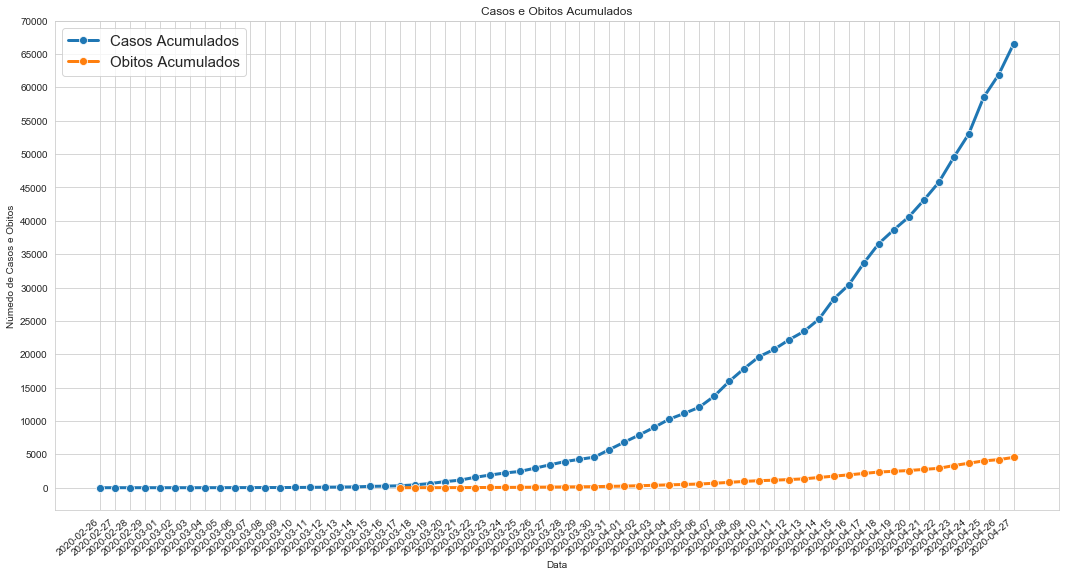

In [140]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5001,5000))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Númedo de Casos e Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

O gráfico acima mostra a evolução da doença no país desde o primeiro dia até hoje - 27/04 -, nele é possivel observar que os casos confirmados estão aumentando cada vez mais, sem sinal de diminuição. Quanto aos óbitos, levou 24 dias da primeira até a milésima morte, hoje, 17 dias depois esse número ja é 4x maior.

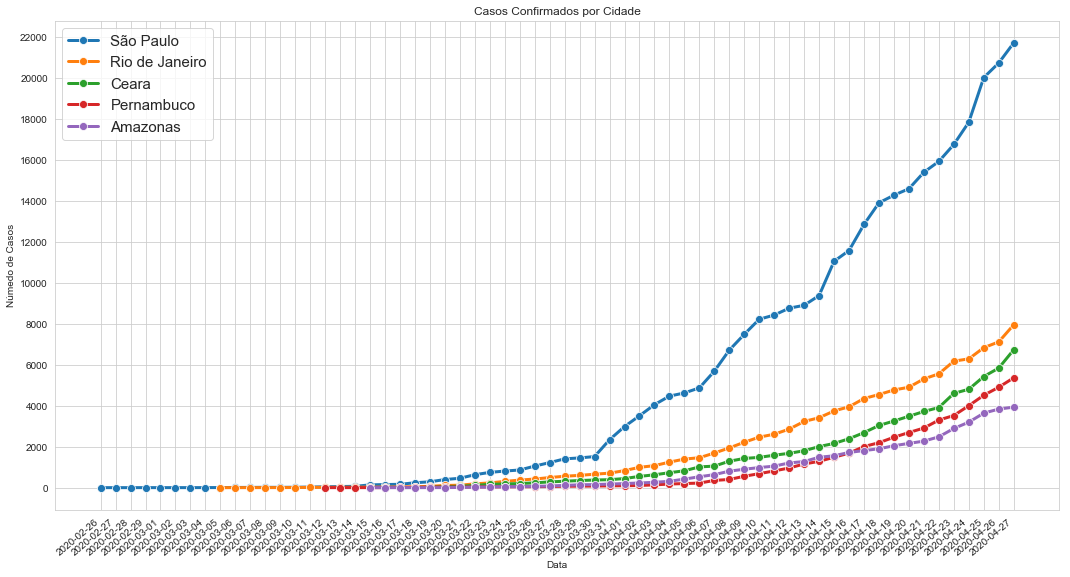

In [139]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data) DOS ESTADOS MAIS ATINGIDOS

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='São Paulo')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'RJ')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Rio de Janeiro')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'CE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Ceara')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'PE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Pernambuco')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AM')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Amazonas')
#Aumenta a legenda
plt.yticks(np.arange(0,cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'].max() + 1000,2000))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
plt.title('Casos Confirmados por Cidade')
plt.ylabel('Númedo de Casos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

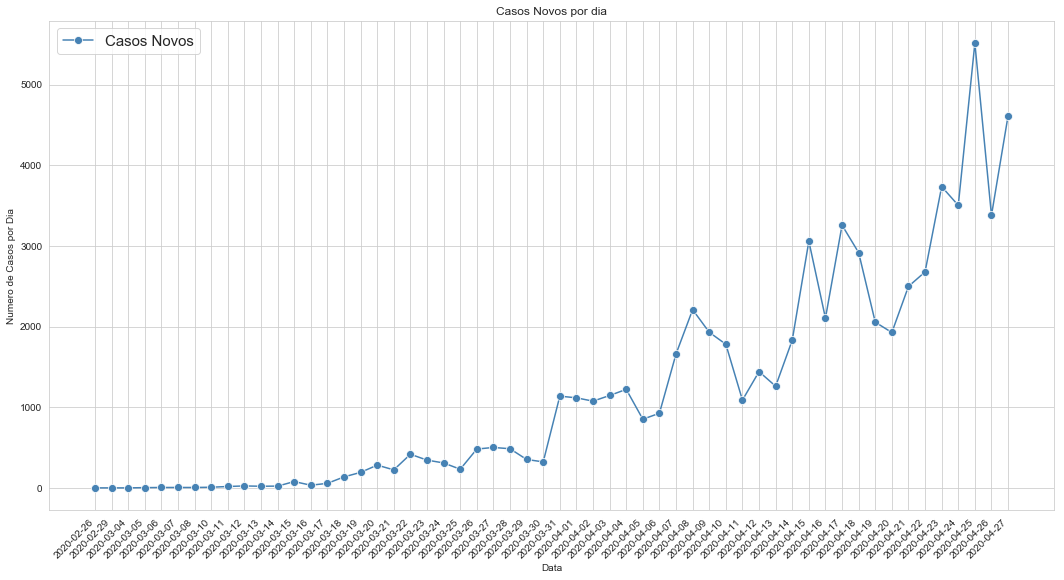

In [103]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,9))
#Cria um gráfico de linhas
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] > 0]['casosNovos'],data=df_por_data,marker='o',
             markersize=8,color='#4682B4',label='Casos Novos')

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumenta tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
#Imprime a legenda
plt.legend()

plt.show()

              Casos Confirmados
regiao                         
Sudeste                   33022
Nordeste                  19427
Norte                      8044
Sul                        3751
Centro-Oeste               2257


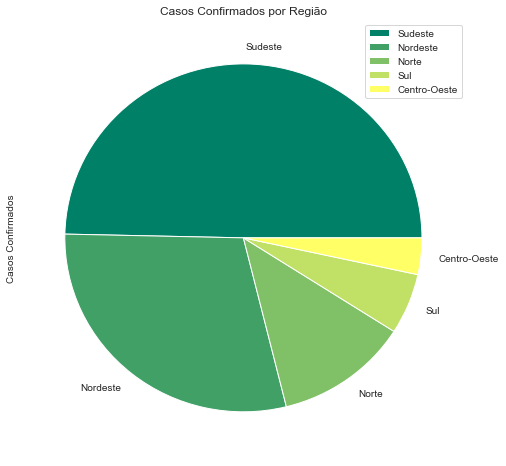

In [73]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Confirmados']
#Imprime o total de casos confirmados por região
print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='summer')
#Insere o título
plt.title('Casos Confirmados por Região')

plt.show()

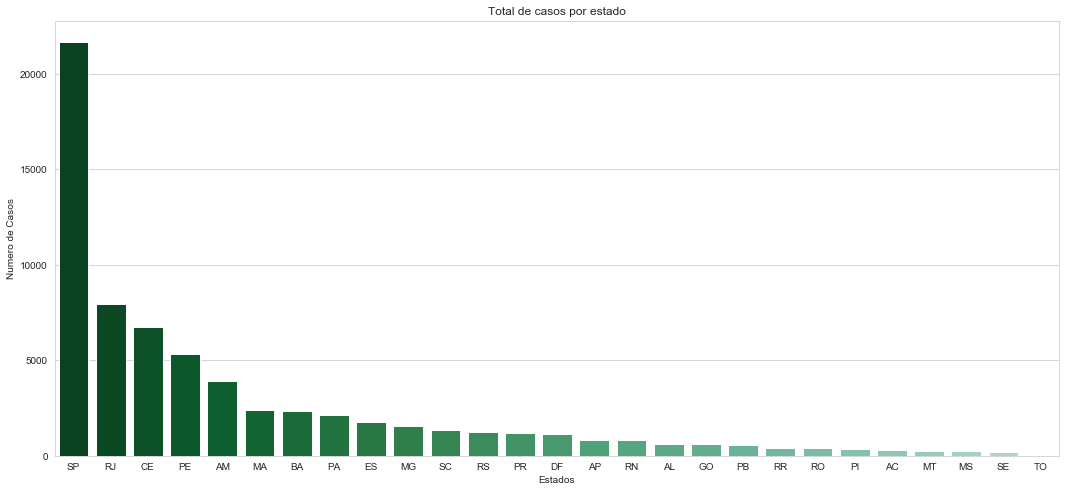

In [104]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,8))
#Imprime um gráfico de barras
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("BuGn_r",n_colors=len(total_casos_por_estado)+12 ))
#Insere o título e a descrição de X e Y
plt.title('Total de casos por estado')
plt.ylabel('Numero de Casos')
plt.xlabel('Estados')

plt.show()

              Óbitos Confirmados
regiao                          
Sudeste                     2621
Nordeste                    1200
Norte                        490
Sul                          160
Centro-Oeste                  72


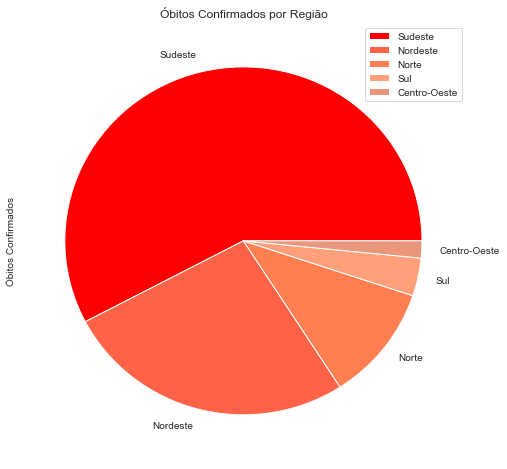

In [106]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Óbitos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),colors=['#FF0000','#FF6347','#FF7F50','#FFA07A','#E9967A'])
#Insere o título
plt.title('Óbitos Confirmados por Região')

plt.show()

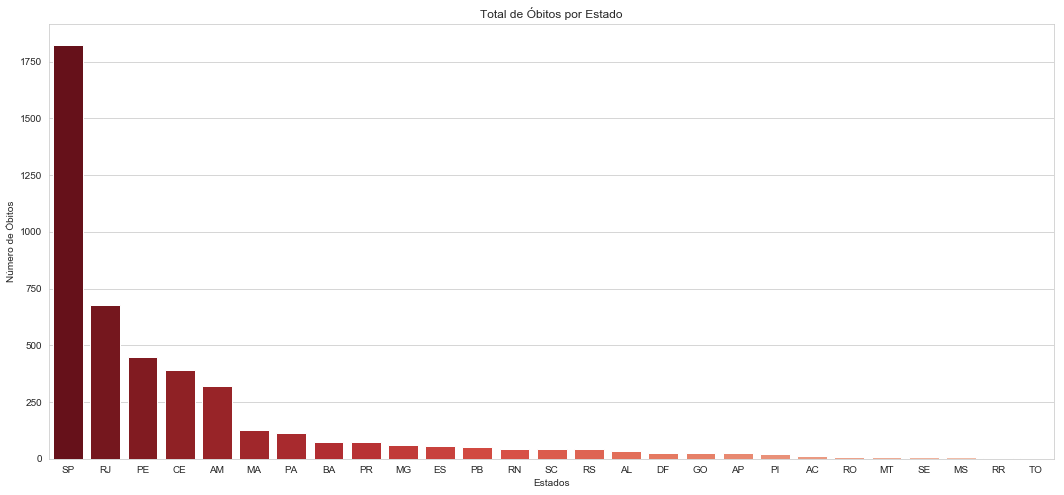

In [107]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Imprime um gráfico de barras
plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='obitosNovos',data=total_casos_por_estado,
            palette=sns.color_palette('Reds_r',n_colors=len(total_casos_por_estado)+6))
#Insere o título e a descrição de X e Y
plt.title('Total de Óbitos por Estado')
plt.ylabel('Número de Óbitos')
plt.xlabel('Estados')

plt.show()

In [49]:
#Casos por semana

In [17]:
#Pensar em mais informações


<strong>Links Úteis:</strong>
* https://oglobo.globo.com/sociedade/coronavirus/em-colapso-pelo-coronavirus-manaus-enterra-1249-em-duas-semanas-ja-teme-falta-de-caixoes-24388568


# ------------------------------------------------------------------------------------<br>
### PERIGO ZONA DE TESTES<br>
# ------------------------------------------------------------------------------------

In [173]:
df_por_data[df_por_data['obitosAcumulados'] >= 1][['obitosAcumulados','data']]
#24 dias da primeira morte até a milésima

,obitosAcumulados,data
47,1,2020-03-17
48,4,2020-03-18
49,6,2020-03-19
50,11,2020-03-20
51,18,2020-03-21
52,25,2020-03-22
53,34,2020-03-23
54,46,2020-03-24
55,57,2020-03-25
56,77,2020-03-26
